# Proyek Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Zulfahmi M. Ardianto
- Laskar ID: A548YBM523

# Import

In [2]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import joblib
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Data Loading

In [3]:
df = pd.read_csv('/content/data.csv', delimiter=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Insight:** Memuat dataset dari jaya jaya institut yang berisi informasi mahasiswa

# Data Understanding

### Exploratory Data Analysis (EDA)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

**Insight:** Terdapat 4424 baris dan puluhan fitur numerik.

In [19]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status_num
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.321203
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.466991
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,0.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


**insight:** Melihat ringkasan statistik deskriptif dari kolom numerik dataset

In [20]:
df.shape

(4424, 38)

**Insight:** Dataset memiliki 4424 data dari 37 fitur

## Distribusi Data

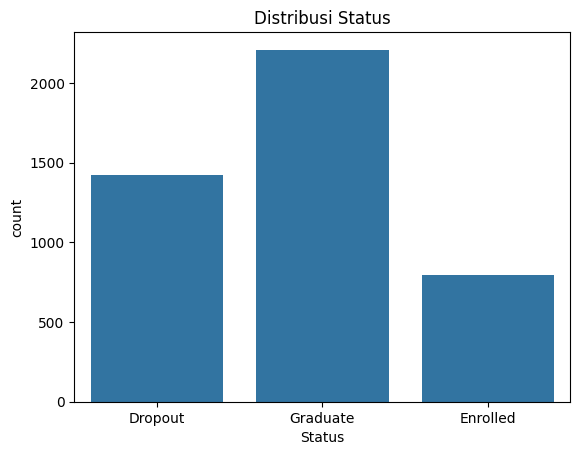

In [21]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status')
plt.show()

**Insight:** Distribusi label tidak seimbang, jumlah mahasiswa dropout lebih sedikit dari yang lulus dan masih lebih tinggi dari yang aktif.

### Korelasi Numerik

In [22]:
df['Status_num'] = df['Status'].apply(lambda x: 1 if x.lower() == 'dropout' else 0)

**Insight:** Label dikonversi ke format biner untuk klasifikasi: 1 = dropout, 0 = bukan dropout.

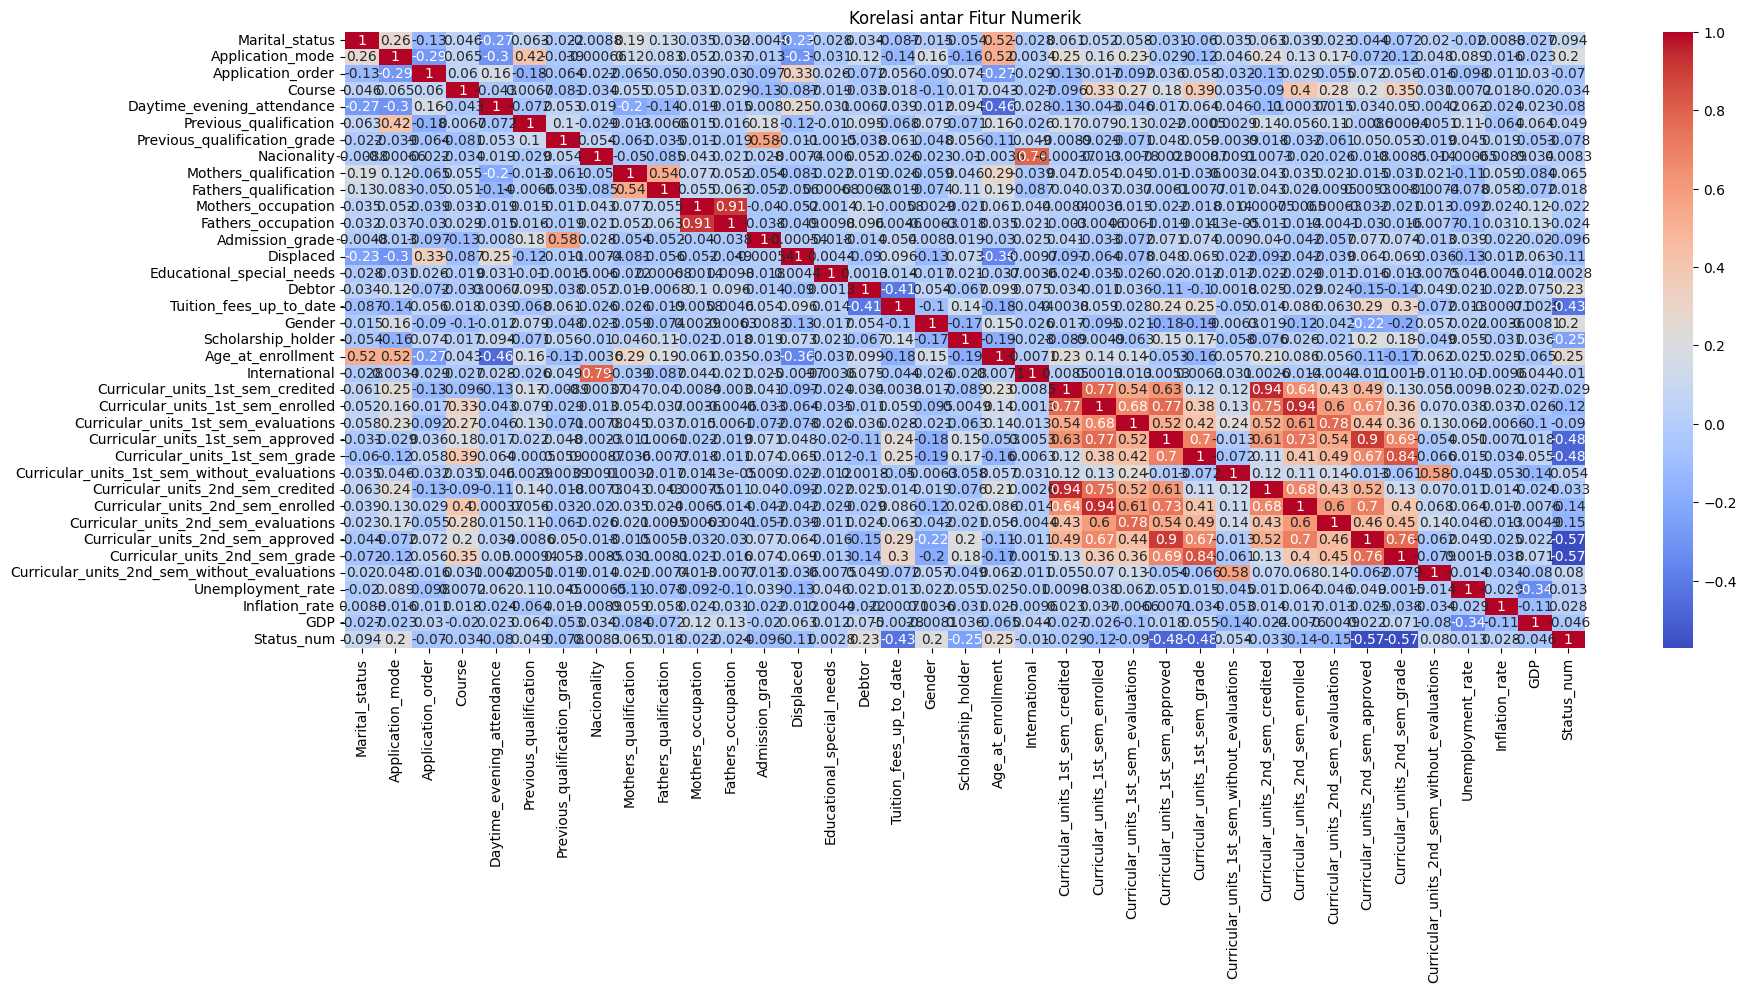

In [23]:
plt.figure(figsize=(20,8))
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()

**Insight:** Fitur-fitur yang berkaitan dengan hasil studi seperti jumlah mata kuliah yang diambil, nilai, dan kelulusan per semester, sangat memengaruhi kemungkinan mahasiswa dropout.

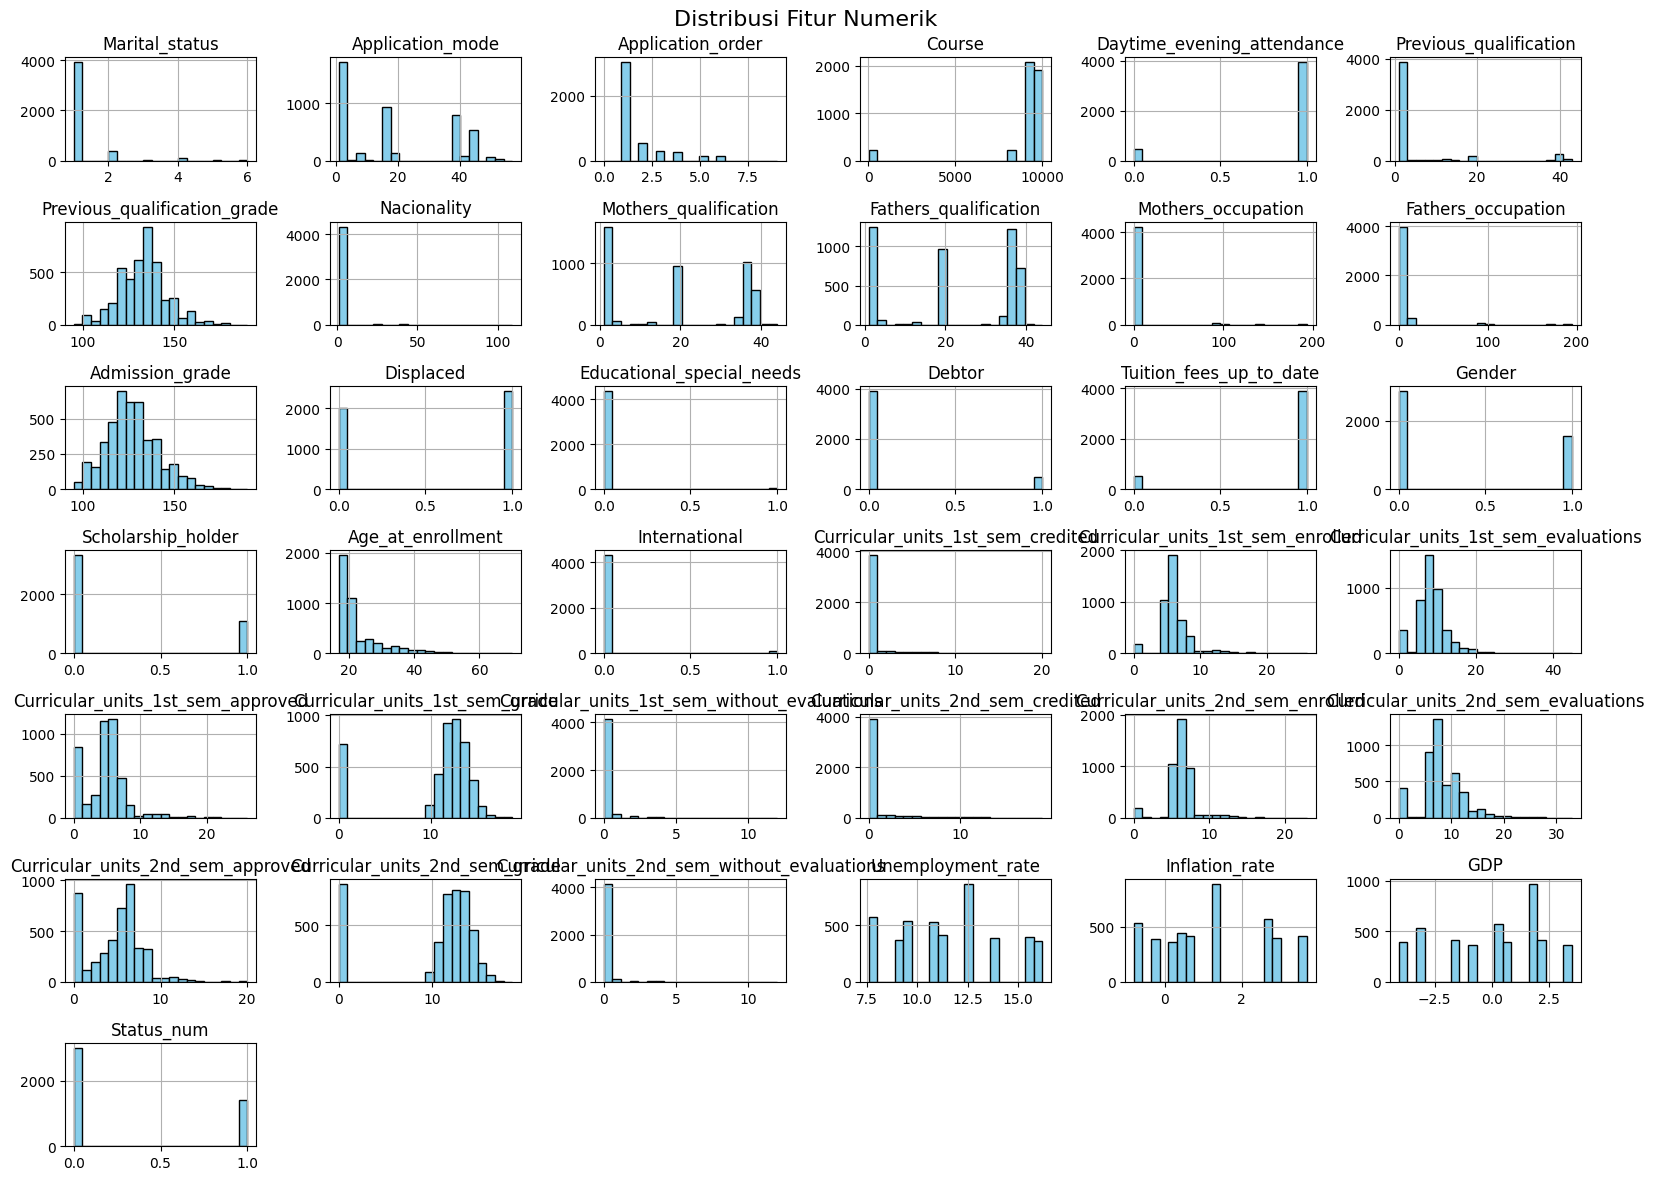

In [24]:
# Distribusi nilai pada fitur numerik
numerik_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerik_cols].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

**Insight:** Melihat distribusi atau sebaran data pada setiap fitur angka. Distribusi fitur dalam dataset menunjukkan bahwa sebagian besar fitur bersifat biner atau sangat tidak merata, fitur akademik memiliki variasi signifikan dengan kecenderungan skew ke kanan, beberapa fitur keluarga dan pendidikan tampak terkode secara kategorikal, usia mahasiswa mayoritas berada pada rentang awal 20-an, serta fitur ekonomi menunjukkan distribusi mendatar yang kemungkinan kecil memengaruhi dropout.

In [36]:
# Menghitung korelasi absolut semua fitur numerik terhadap target
correlation = df.corr(numeric_only=True)['Status_num'].abs().sort_values(ascending=False)
top_features = correlation.drop('Status_num')

# Menampilkan 10 fitur teratas beserta nilai korelasinya
print("Top 10 Fitur dengan Korelasi Tertinggi terhadap Dropout:")
print(top_features.head(5))

Top 10 Fitur dengan Korelasi Tertinggi terhadap Dropout:
Curricular_units_2nd_sem_grade       0.571792
Curricular_units_2nd_sem_approved    0.569500
Curricular_units_1st_sem_grade       0.480669
Curricular_units_1st_sem_approved    0.479112
Tuition_fees_up_to_date              0.429149
Name: Status_num, dtype: float64


**insight:** menampilkan 5 fitur teratas yang memiliki hubungan paling kuat. Analisis korelasi menunjukkan empat fitur teratas yang paling kuat hubungannya dengan status dropout adalah Curricular_units_2nd_sem_grade, Curricular_units_2nd_sem_approved, Curricular_units_1st_sem_grade, dan Curricular_units_1st_sem_approved. Fitur Tuition_fees_up_to_date juga masuk dalam lima besar, menunjukkan perannya sebagai faktor penting.

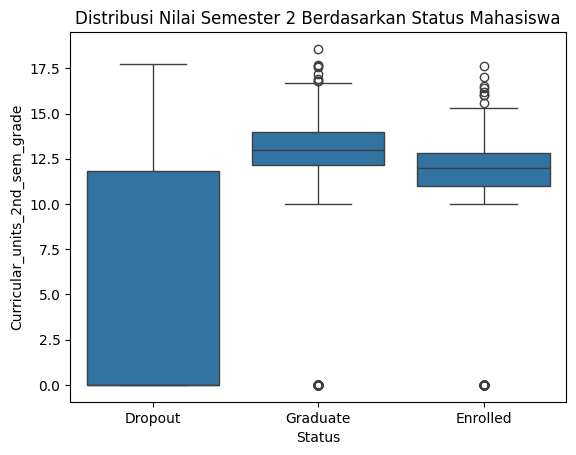

In [26]:
sns.boxplot(x='Status', y='Curricular_units_2nd_sem_grade', data=df)
plt.title('Distribusi Nilai Semester 2 Berdasarkan Status Mahasiswa')
plt.show()

**Insight:** Data menunjukkan bahwa Curricular_units_2nd_sem_grade (nilai semester 2) adalah salah satu prediktor terkuat untuk status dropout. Terdapat perbedaan performa akademik yang mencolok, di mana mahasiswa yang dropout memiliki distribusi nilai yang jauh lebih rendah dan bervariasi secara signifikan dibandingkan dengan mahasiswa yang lulus atau masih terdaftar. Hal ini menyoroti pentingnya performa di semester kedua sebagai indikator krusial untuk mendeteksi risiko dropout sejak dini.

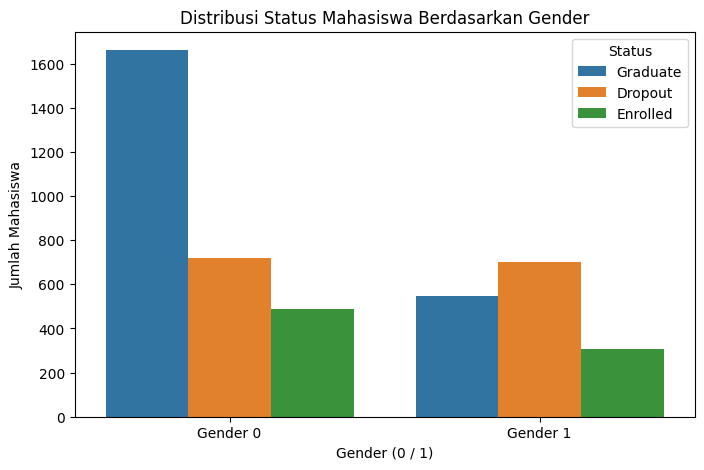

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Distribusi Status Mahasiswa Berdasarkan Gender')
plt.xlabel('Gender (0 / 1)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status')
plt.xticks([0, 1], ['Gender 0', 'Gender 1'])
plt.show()

- The gender of the student. (Categorical)
- 1 = male
- 0 = female

  - **Insight:** Gender merupakan faktor demografis yang signifikan dalam memprediksi status kelulusan. Analisis menunjukkan bahwa mahasiswa laki-laki (Gender 1) memiliki risiko dropout yang lebih tinggi daripada tingkat kelulusannya, sebuah tren yang berbanding terbalik dengan mahasiswa perempuan (Gender 0) yang menunjukkan tingkat kelulusan yang jauh lebih dominan.

## Cek Missing Value

In [38]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


**Insight**: dataset ini tidak terdapat missing value

## Cek Outlier

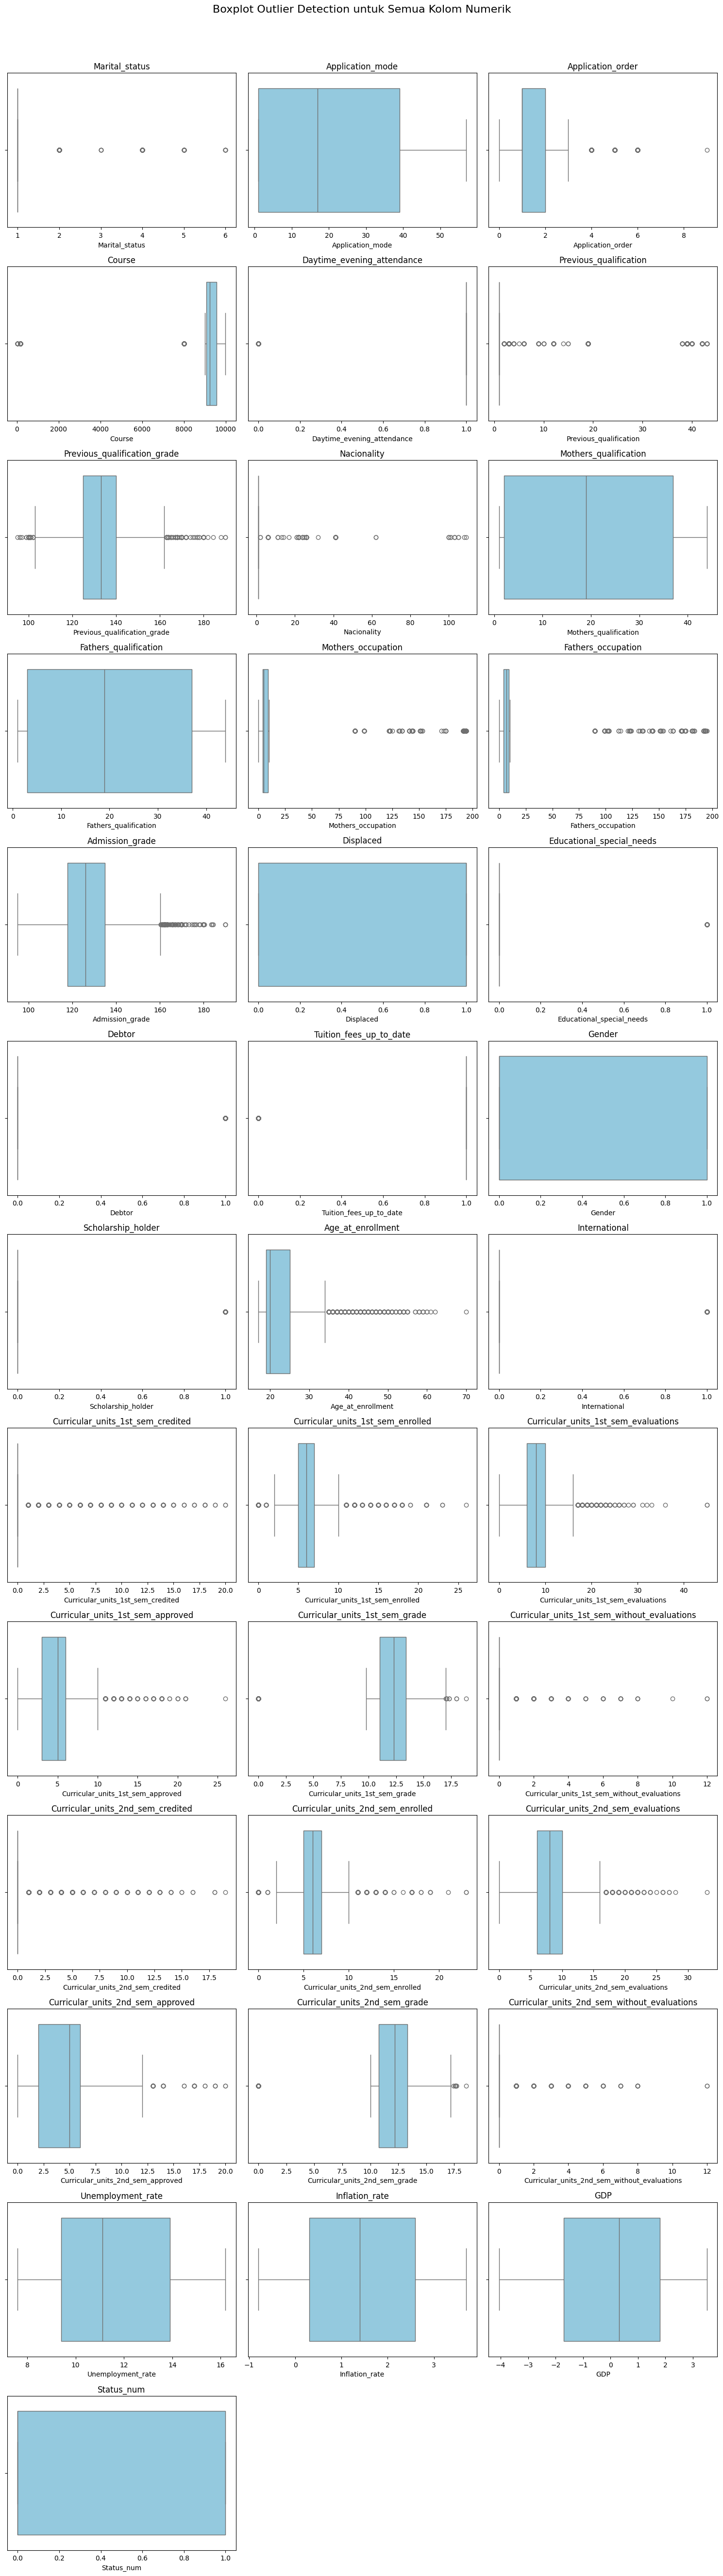

In [29]:
# Ambil semua kolom numerik
numerik_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Tentukan jumlah kolom & baris subplot
n = len(numerik_cols)
n_cols = 3
n_rows = (n // n_cols) + int(n % n_cols > 0)

# Plot semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerik_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplot Outlier Detection untuk Semua Kolom Numerik', y=1.02, fontsize=16)
plt.show()

**Insight**: Meskipun melihat beberapa outlier pada visualisasi boxplot,  tidak perlu terlalu khawatir karena XGBoost tidak terlalu terpengaruh oleh outlier dan bisa dianggap cukup robust (tangguh) terhadapnya.

# Data Preparation

In [30]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Status', 'Status_num'])
y = df['Status_num'] # Target kita adalah 1 untuk Dropout, 0 untuk lainnya

**Insight:** Semua data mahasiswa (X) akan digunakan untuk secara otomatis mengidentifikasi mahasiswa mana yang paling berisiko untuk dropout (y)

In [31]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Bentuk data sebelum SMOTE:")
print(X_train.shape)
print("Distribusi kelas pada data latih sebelum SMOTE:")
print(y_train.value_counts())

Bentuk data sebelum SMOTE:
(3539, 36)
Distribusi kelas pada data latih sebelum SMOTE:
Status_num
0    2402
1    1137
Name: count, dtype: int64


**Insight:** Membagi dataset menjadi 80 data latih dan 20 data uji, terlihat bahwa ada 3539 data latih yang terdiri dari 2402 dropout dan 1137 untuk enroll dan gradute

In [32]:
# Meskipun XGBoost tidak terlalu sensitif terhadap skala, ini adalah praktik yang baik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Insight:**  Melakukan scaling dengan standarisasi

In [33]:
# menerapkan SMOTE pada data latih untuk menghindari kebocoran data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nBentuk data setelah SMOTE:")
print(X_train_smote.shape)
print("Distribusi kelas pada data latih setelah SMOTE:")
print(y_train_smote.value_counts())


Bentuk data setelah SMOTE:
(4804, 36)
Distribusi kelas pada data latih setelah SMOTE:
Status_num
1    2402
0    2402
Name: count, dtype: int64


**Insight:** Mengatasi masalah paling umum dalam prediksi status mahasiswa, yaitu data yang tidak seimbang.



# Modeling

In [34]:
# Tentukan rentang nilai untuk setiap hyperparameter yang ingin di-tuning
param_grid = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

# Inisialisasi model dasar XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Coba 50 kombinasi acak
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1 # Menampilkan progress
)

# Melatih Model dengan Tuning ---
print("Memulai Hyperparameter Tuning dengan RandomizedSearchCV...")
random_search.fit(X_train_smote, y_train_smote)
print("Tuning selesai.")

# Menampilkan parameter terbaik yang ditemukan
print("\nParameter terbaik yang ditemukan:")
print(random_search.best_params_)

# Mendapatkan model terbaik
best_model = random_search.best_estimator_

Memulai Hyperparameter Tuning dengan RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:45:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuning selesai.

Parameter terbaik yang ditemukan:
{'colsample_bytree': np.float64(0.6296178606936361), 'gamma': np.float64(0.1792328642721363), 'learning_rate': np.float64(0.04476071785753891), 'max_depth': 9, 'n_estimators': 300, 'subsample': np.float64(0.8493192507310232)}


**Insight:** Melakukan pencarian otomatis guna menemukan konfigurasi (hyperparameter) terbaik untuk model XGBoost

# Evaluasi


Confusion Matrix:


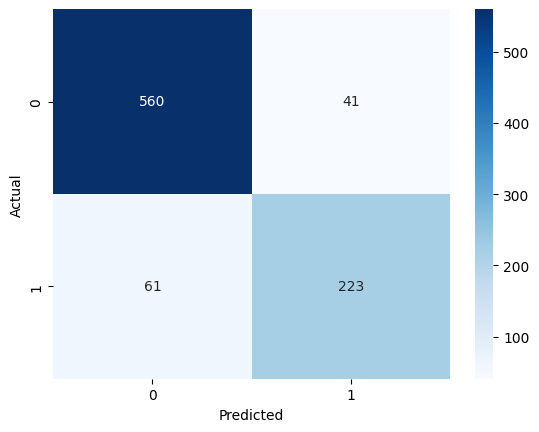


--- Hasil Evaluasi Model Terbaik ---
Akurasi Model: 0.8847

Array Confusion Matrix:
[[560  41]
 [ 61 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       601
           1       0.84      0.79      0.81       284

    accuracy                           0.88       885
   macro avg       0.87      0.86      0.87       885
weighted avg       0.88      0.88      0.88       885



In [39]:
# Melakukan prediksi pada data uji menggunakan model terbaik
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Menampilkan hasil evaluasi model terbaik
print("\n--- Hasil Evaluasi Model Terbaik ---")
print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.4f}")

print("\nArray Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


- Kesimpulan dari Hasil Evaluasi Model
  - Secara keseluruhan, model yang Anda bangun memiliki performa yang baik dan menjanjikan dengan akurasi 88.47%. Namun, untuk memahami kegunaannya secara nyata, kita perlu membedah performanya lebih dalam.

- 1. Analisis Confusion Matrix (Prediksi Benar vs. Salah)
Prediksi yang Benar:

  - 560 (True Negative): Model dengan sangat baik berhasil mengidentifikasi 560 mahasiswa yang memang tidak berisiko (kelas 0) dan melabeli mereka dengan benar.
  - 223 (True Positive): Model juga berhasil menemukan 223 mahasiswa yang memang berisiko (kelas 1) dan mengidentifikasi mereka dengan benar.
  - 41 (False Positive): Ada 41 mahasiswa yang sebenarnya tidak berisiko, tetapi oleh model salah ditandai sebagai "berisiko". Ini bisa menyebabkan intervensi yang tidak perlu, namun risikonya lebih kecil.
 - 61 (False Negative): Ada 61 mahasiswa yang sebenarnya berisiko, tetapi oleh model dianggap "tidak berisiko". Ini adalah kesalahan paling kritis, karena mahasiswa-mahasiswa ini tidak akan mendapat perhatian khusus padahal mereka membutuhkannya.
- 2. Insight dari Classification Report
Laporan ini memberikan detail performa untuk masing-masing kelas:

- Untuk Kelas 1 (Mahasiswa Berisiko):

   - Recall = 0.79 (79%): Ini adalah metrik terpenting. Artinya, dari semua mahasiswa yang sebenarnya berisiko, model Anda berhasil "menangkap" 79% dari mereka. Sisanya 21% (atau 61 orang) terlewatkan.
   - Precision = 0.84 (84%): Artinya, ketika model Anda menandai seorang mahasiswa sebagai "berisiko", prediksi itu benar sebanyak 84%. Sisanya 16% adalah "salah alarm" (False Positive).

- Untuk Kelas 0 (Mahasiswa Tidak Berisiko):

 - Model ini sangat andal dalam mengidentifikasi mahasiswa yang tidak berisiko, dengan Recall 93% dan Precision 90%.


--- 10 Fitur Paling Berpengaruh ---
                              feature  importance
30  Curricular_units_2nd_sem_approved    0.219873
16            Tuition_fees_up_to_date    0.165685
24  Curricular_units_1st_sem_approved    0.043152
15                             Debtor    0.036711
22  Curricular_units_1st_sem_enrolled    0.031713
17                             Gender    0.027846
18                 Scholarship_holder    0.027691
28  Curricular_units_2nd_sem_enrolled    0.026838
27  Curricular_units_2nd_sem_credited    0.023894
31     Curricular_units_2nd_sem_grade    0.023674


<ipython-input-41-edd8d786d647>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis')


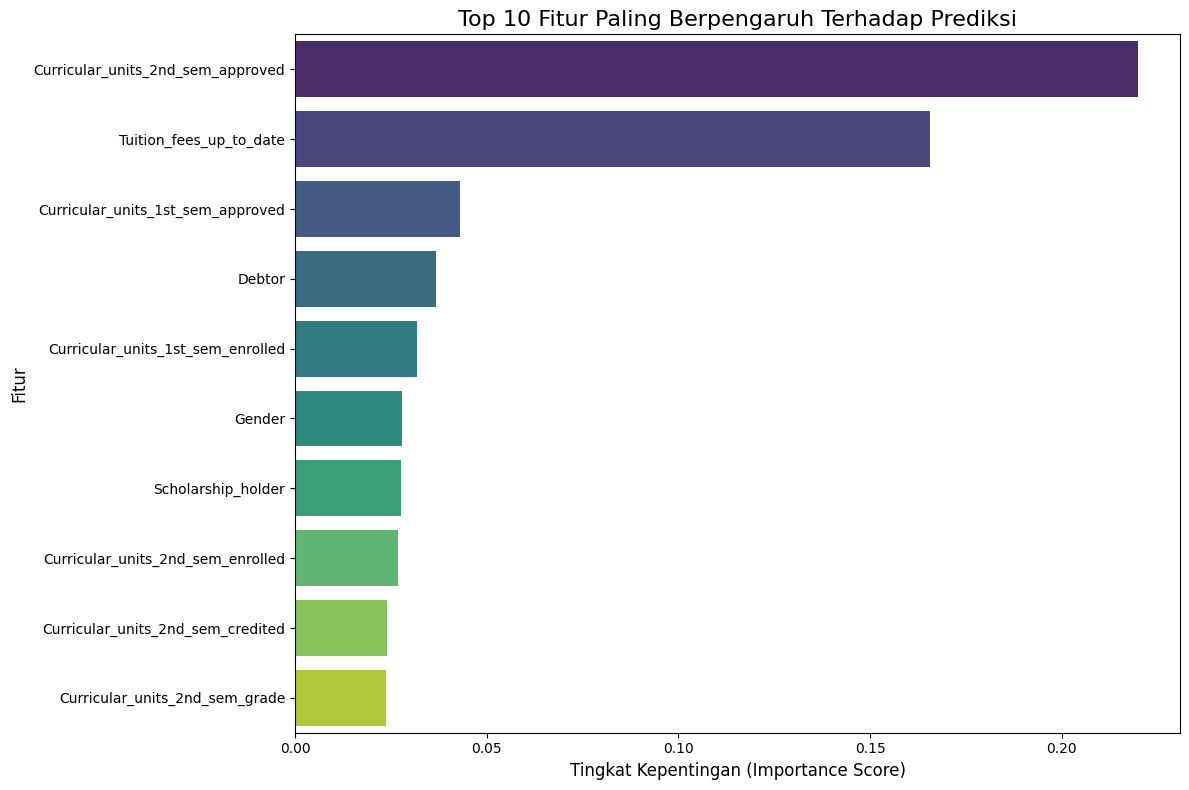

In [41]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})

# 2. Urutkan fitur dari yang paling penting dan ambil 10 teratas
top_10_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

# 3. Tampilkan hasilnya dalam bentuk tabel
print("\n--- 10 Fitur Paling Berpengaruh ---")
print(top_10_features)

# 4. Buat visualisasi agar lebih mudah dipahami
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Fitur Paling Berpengaruh Terhadap Prediksi', fontsize=16)
plt.xlabel('Tingkat Kepentingan (Importance Score)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Fitur Curricular_units_2nd_sem_approved (jumlah SKS yang lulus di semester 2) adalah prediktor terkuat dengan selisih yang sangat besar. Ini menandakan bahwa semester kedua adalah "titik penentuan". Secara mengejutkan, jumlah SKS yang lulus di semester 2 (fitur #1) jauh lebih berpengaruh daripada rata-rata nilai di semester yang sama (Curricular_units_2nd_sem_grade, fitur #10). Ini mengindikasikan bahwa kemampuan mahasiswa untuk sekadar "bertahan dan menyelesaikan mata kuliah" adalah prediktor yang lebih kuat daripada apakah mereka mendapat nilai A atau B.

- Fitur Tuition_fees_up_to_date (status pembayaran SPP) dan Debtor (memiliki utang) berada di peringkat #2 dan #4. Ini menegaskan bahwa kesulitan finansial adalah faktor risiko yang sangat signifikan, hampir setara dengan kegagalan akademik. Mahasiswa yang menunggak pembayaran berada dalam posisi yang sangat rentan.

# Save Model

In [42]:
import joblib

# (best_model, scaler, dan X sudah ada dari sel-sel sebelumnya)

# Menyimpan Model Terbaik
joblib.dump(best_model, 'dropout_model.joblib')

# Menyimpan Scaler
joblib.dump(scaler, 'scaler.joblib')

# Menyimpan Urutan Fitur (SANGAT PENTING)
feature_order = list(X.columns)
joblib.dump(feature_order, 'feature_order.joblib')

print("\nModel, scaler, dan urutan fitur berhasil disimpan.")


Model, scaler, dan urutan fitur berhasil disimpan.


**Insight**: menyimpan model terbaik dengan ekstensi joblib